##### <div style="color:red;background-color:#47B39C;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">IRIS FLOWER CLASSIFICATION</div>

### <a id="60" style="color:red">Importing packages</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### <a id="60" style="color:red">Loading Dataset</a>

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### <a id="61" style="color: red;"> Exploratory Data Analysis (EDA): </a>

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df=df.drop(['Id'],axis=1)

In [11]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

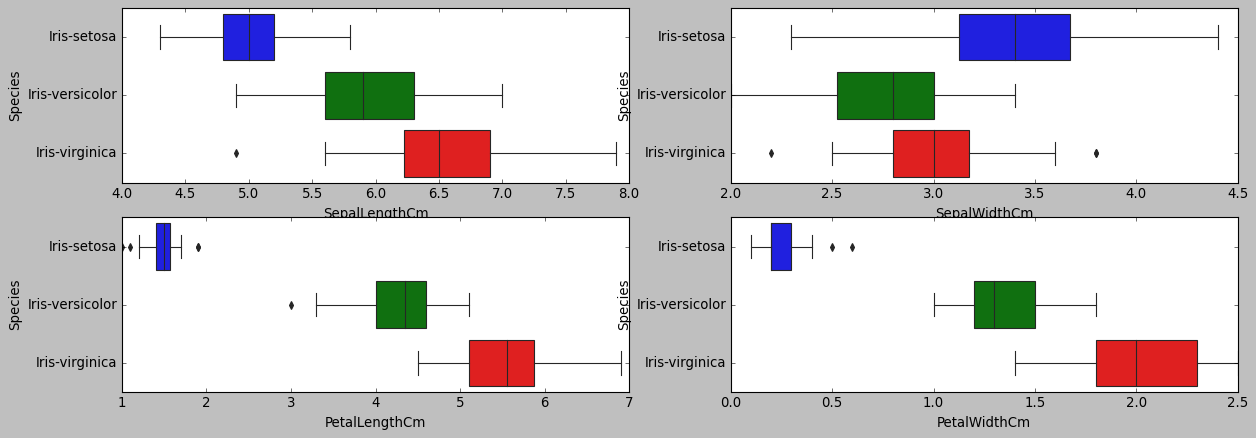

In [12]:
plt.figure(figsize = (18,6))

for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = df, y = 'Species', x = z,orient = 'h')
plt.show()

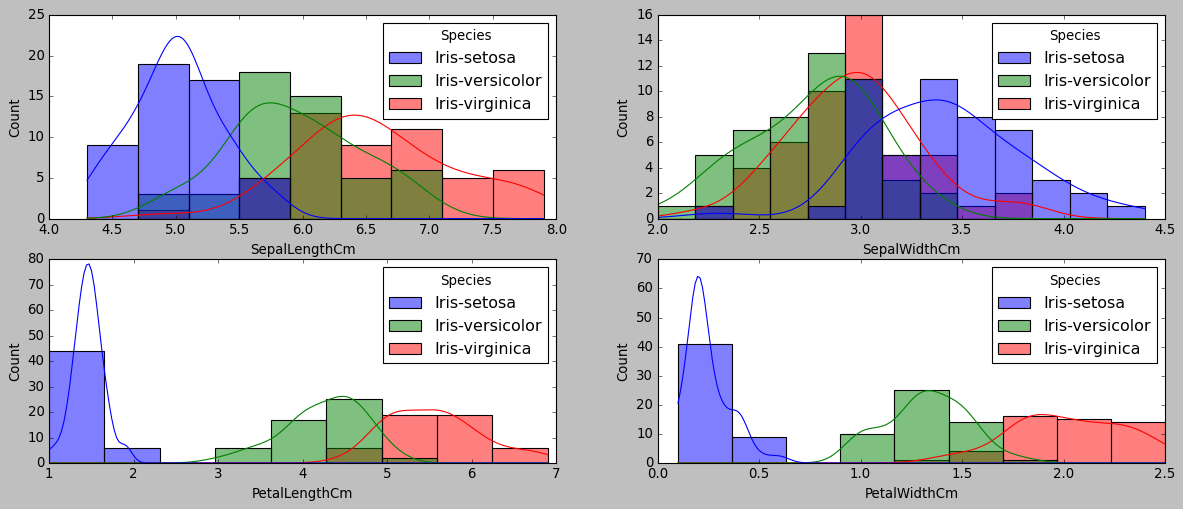

In [13]:
plt.figure(figsize = (18,7))

for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Species')
plt.show()

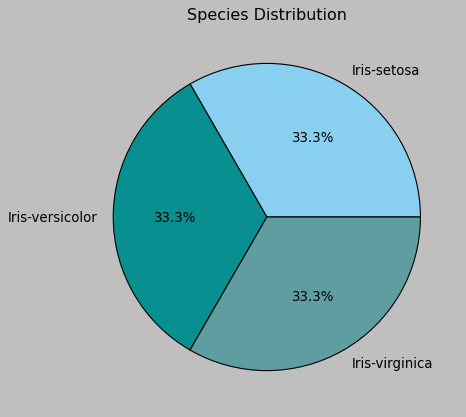

In [15]:
species_counts = df['Species'].value_counts()
plt.pie(species_counts, labels=species_counts.index, colors=['#89CFF0', '#088F8F', '#5F9EA0'], autopct='%1.1f%%')
plt.title('Species Distribution')
plt.show()

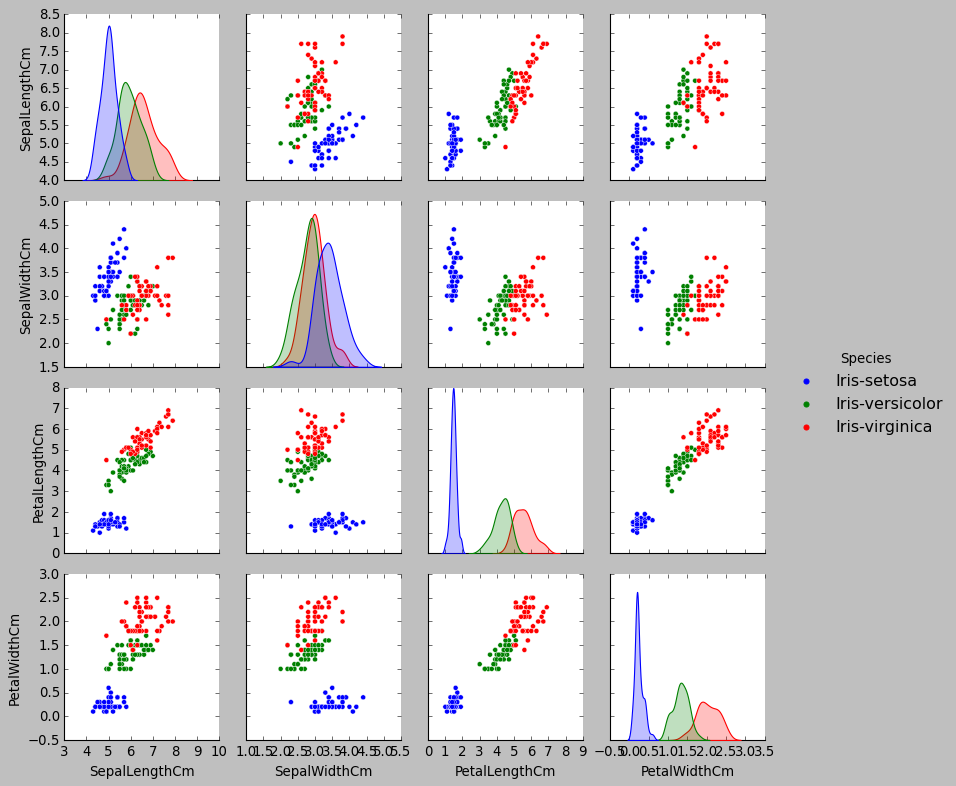

In [16]:
sns.pairplot(data = df , hue = 'Species')

In [17]:
df['Species'] = df['Species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


### Correlation Matrix

A correlation matrix is a table or a matrix that displays the correlation coefficients between many variables. Each cell in the table shows the correlation between two variables.

The correlation coefficient can take values between -1 and 1

A correlation of 1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other also increases in a linear fashion.

A correlation of -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other decreases in a linear fashion.

A correlation of 0 suggests no linear relationship between the variables; they are not linearly related

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
correlation_matrix = df.corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


<Axes: >

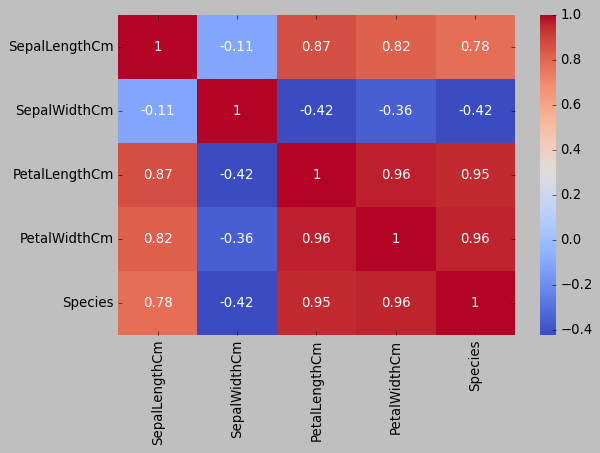

In [19]:
corr = correlation_matrix
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

### <a id="61" style="color: red;"> Model Accuracy: </a>

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns=['Species'])
Y = df['Species']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

### <a id="61">Logistic Regression:</a>

In [23]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### <a id="61" style="color: green;"> Model Accuracy: </a>

In [24]:
print("Accuracy(Logistic Regression): ",model.score(x_test,y_test)*100)

Accuracy(Logistic Regression):  100.0


### <a id="61"> Support Vector Classifier: </a>

In [25]:
model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [26]:
prediction2 = model_svc.predict(x_test)

### <a id="61" style="color: green;"> Model Accuracy: </a>

In [27]:
print("Accuracy(Support Vector Classifier): ",accuracy_score(y_test,prediction2)*100)

Accuracy(Support Vector Classifier):  100.0
